# Introduction to Analyzing Congressional Records with Python in Jupyter Notebook

This guide will walk you through the process of analyzing a dataset of U.S. Congressional records using Python in a Jupyter Notebook environment. We'll explore the data, perform various analyses, and visualize the results. This process involves loading and processing text data, conducting descriptive and sentiment analyses, and applying natural language processing (NLP) techniques.

## Step 1: Setting Up Your Jupyter Notebook

Open Jupyter Notebook in your development environment. You can do this by launching your terminal or command prompt and running the command `jupyter notebook`. Navigate to your project directory and create a new notebook.

## Step 2: Import Necessary Libraries

Before starting our analysis, we need to import several Python libraries that will help us process and analyze the data. Below is a brief overview of each library and what it's used for:

- `os`: Provides a way of using operating system-dependent functionality. [Learn more](https://docs.python.org/3/library/os.html).
- `nltk`: The Natural Language Toolkit, used for working with human language data. [Learn more](https://www.nltk.org/).
- `pandas`: A data analysis and manipulation library. [Learn more](https://pandas.pydata.org/).
- `matplotlib.pyplot`: A plotting library for creating various types of graphs and charts. [Learn more](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).
- `WordCloud`: Used for generating word clouds. [Learn more](https://amueller.github.io/word_cloud/).
- `nltk.tokenize.word_tokenize`: Function for tokenizing strings. [Learn more](https://www.nltk.org/api/nltk.tokenize.html).
- `nltk.corpus.stopwords`: Provides a list of 'stop words'. [Learn more](https://www.nltk.org/nltk_data/).
- `nltk.probability.FreqDist`: Used for the frequency distribution of words. [Learn more](https://www.nltk.org/api/nltk.probability.html).
- `nltk.sentiment.SentimentIntensityAnalyzer`: Tool for determining the sentiment of a text. [Learn more](https://www.nltk.org/api/nltk.sentiment.html).
- `gensim`: Used for topic modeling and document similarity. [Learn more](https://radimrehurek.com/gensim/).
- `tqdm`: A library for providing progress bars to loops. [Learn more](https://tqdm.github.io/).


In [1]:
import os
import nltk
import pandas as pd
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models
from tqdm import tqdm

# Ensure the necessary NLTK datasets are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\Tianyi
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Tianyi
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Tianyi
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Step 3: Loading the Data

To begin our analysis, we first need to load the text data from the Congressional records. We will define a function `load_text_files` to read text files from a specified directory and store their contents in a dictionary for easy access. This function utilizes `tqdm` for showing a progress bar, which helps in tracking the file-loading process, especially useful when dealing with a large number of files.

### The `load_text_files` Function

This function takes a directory path as input and reads each text file, storing its contents in a dictionary. The keys of the dictionary are the file names, and the values are the contents of the files.


In [2]:
# Read the processed text files into a dictionary
def load_text_files(directory):
    text_data = {}
    for i in tqdm(range(104, 119), desc="Loading Files"):
        file_path = os.path.join(directory, f'Processed_Congress_{i}.txt')
        with open(file_path, 'r', encoding='utf-8') as file:
            text_data[f'Congress_{i}'] = file.read()
    return text_data

### Loading the Dataset
Now, let's call this function to load our dataset. Make sure to replace the path with the path to your data directory.

In [3]:
'''
Put the text data into a dataframe
Make sure to replace with your own directory path with the processed text files
'''

dataset = load_text_files('C:\\Users\\Tianyi Zhang\\Desktop\\Lab\\Processed_Text')

Loading Files: 100%|██████████| 15/15 [00:01<00:00, 13.35it/s]


After running this code, you will have a dictionary named `dataset` where each Congressional record is stored as a text value, accessible using its corresponding key.

## Step 4: Frequency Analysis

After loading the data, the next step is to perform a frequency analysis. This will help us identify the most commonly used words in the Congressional records. Frequency analysis is a fundamental technique in text analysis that allows us to get a sense of the most prominent themes and topics in the text.

### Step 4.1: Tokenization and Frequency Distribution

First, we'll tokenize the text, breaking it down into individual words. Then, we'll use the `FreqDist` function from NLTK to create a frequency distribution, which counts the occurrences of each word.


In [4]:
# Combine all text data for frequency analysis
all_text = ' '.join(dataset.values())

# Tokenize the text
tokens = word_tokenize(all_text)

# Create a frequency distribution
fdist = FreqDist(tokens)

### Step 4.2: Identifying Common Words

Next, we can identify the most common words in the dataset. This gives us a quick overview of the key terms and topics being discussed in the Congressional records.


In [5]:
# Displaying the 500 - 1000 most common words
common_words = fdist.most_common(500)  # Adjust number as needed
print(common_words)

[('mr', 2103653), ('senat', 2013819), ('state', 1977398), ('presid', 1542148), ('year', 1344007), ('amend', 1278899), ('section', 1273255), ('act', 1265736), ('shall', 1199375), ('bill', 1107636), ('unit', 1024489), ('provid', 928020), ('b', 914974), ('would', 900377), ('program', 877733), ('nation', 864781), ('offic', 863128), ('committe', 823330), ('secretari', 801666), ('c', 748984), ('servic', 733764), ('follow', 719939), ('may', 718476), ('feder', 703500), ('time', 676112), ('law', 664761), ('fund', 651973), ('us', 639340), ('includ', 638798), ('peopl', 625885), ('work', 621940), ('report', 607739), ('use', 599655), ('requir', 590529), ('author', 589185), ('subsect', 584216), ('make', 574958), ('one', 571527), ('health', 570073), ('secur', 560702), ('new', 555837), ('go', 552039), ('gener', 550322), ('appropri', 536963), ('american', 523759), ('order', 522837), ('titl', 506026), ('govern', 494713), ('depart', 494219), ('sec', 487794), ('support', 486882), ('need', 486597), ('parag

### Step 4.3: Creating a Custom Stop Words List
After displaying the most common words in our dataset, it becomes evident that even with the use of NLTK's stop words removal, there are still words that may not be particularly meaningful or insightful in the context of our specific analysis. This observation underscores an important aspect of text analysis: the identification and removal of stop words can often be a subjective process, heavily dependent on the nature of the dataset and the specific goals of the research.

#### The Subjectivity of Defining Stop Words

While standard stop word lists (like the one provided by NLTK) are a great starting point, they often need to be supplemented with a custom list of words that are identified based on the context and content of the dataset. What constitutes a 'stop word' can vary greatly depending on the subject matter, the nature of the text, and the research questions being addressed.

#### Tailoring the Stop Words List to Your Dataset

It is essential for researchers to carefully review the most frequent words in their datasets and decide which ones are not contributing to their specific analytical goals. This process involves:

- Identifying words that are highly frequent but contextually irrelevant or too generic.
- Considering the research objectives and how certain words may or may not align with these goals.
- Continuously refining the stop words list as more insights are gained about the dataset during the analysis.

#### Finding the Balance

Ultimately, the determination of what constitutes a stop word in your analysis is a balance that each researcher must strike, based on their knowledge of the dataset and the specific needs of their research. This is a dynamic process, and it is not uncommon to revisit and revise your list of stop words as you explore more into the data.


#### Generating a Candidate List of Custom Stop Words
Let's first print out a list of the most common words (500-1000 words) to manually identify and create a list of additional stop words.

In [6]:
# Adjust the number to print out more words if needed
for word, frequency in fdist.most_common(1000):
    print(word, frequency)

mr 2103653
senat 2013819
state 1977398
presid 1542148
year 1344007
amend 1278899
section 1273255
act 1265736
shall 1199375
bill 1107636
unit 1024489
provid 928020
b 914974
would 900377
program 877733
nation 864781
offic 863128
committe 823330
secretari 801666
c 748984
servic 733764
follow 719939
may 718476
feder 703500
time 676112
law 664761
fund 651973
us 639340
includ 638798
peopl 625885
work 621940
report 607739
use 599655
requir 590529
author 589185
subsect 584216
make 574958
one 571527
health 570073
secur 560702
new 555837
go 552039
gener 550322
appropri 536963
american 523759
order 522837
titl 506026
govern 494713
depart 494219
sec 487794
support 486882
need 486597
paragraph 477704
commun 475940
public 472075
hous 463593
administr 452002
legisl 439383
countri 433947
purpos 425181
plan 422347
congress 419834
agenc 412196
made 410818
member 410292
insert 407517
amount 406694
tax 396189
assist 393833
f 391716
care 391455
vote 390037
fiscal 386380
develop 386108
say 385336
right 3846

After this step, we will have a clearer understanding of which words to filter out in subsequent analyses to refine our focus on more meaningful and insightful content in the Congressional records. Then, create a custom list of stop words to remove.

In [7]:
# Define custom stopwords
custom_stop_words = [
    'mr', 'state', 'presid', 'year', 'shall', 'unit', 'b', 'would', 'program', 
    'offic', 'c', 'servic', 'follow', 'may', 'time', 'includ','report', 'use',
    'requir', 'author', 'subsect','make', 'one', 'secur', 'new', 'go', 'gener', 'appropri', 
    'american', 'order', 'titl', 'govern', 'depart', 'sec', 'support', 'need', 'paragraph', 
    'hous', 'administr', 'legisl', 'countri', 'purpos', 'plan', 
    'congress', 'agenc', 'made', 'member', 'insert', 'amount', 'assist', 
    'f', 'care', 'vote', 'fiscal', 'develop', 'say', 'right', 'day', 'term', 
    'educ', 'system', 'get', 'r', 'record', 'propos', 'e', 'end', 'busi', 'issu', 
    'percent', 'also', 'inform', 'receiv', 'want', 'strike', 'take', 'defens', 
    'rule', 'date', 'ask', 'relat', 'mani', 'individu', 'cost', 
    'activ', 'ii', 'know', 'usc', 'import', 'increas', 'first', 
    'today', 'avail', 'think', 'determin', 'person', 'submit', 'provis', 
    'call', 'mean', 'establish', 'without', 'way', 'forc', 'come', 
    'respect', 'effect', 'oper', 'resolut', 'help', 'continu', 'ad', 'like', 
    'said', 'part', 'po', 'frm', 'fmt', 'jkt', 'sfmt', 'verdat', 
    'request', 'colleagu', 'describ', 'grant', 'case', 'n', 'applic', 'manag', 
    'repres', 'million', 'code', 'object', 'period', 'could', 'last',
    'court', 'benefit', 'number', 'pursuant', 'area', 'subparagraph', 'respons',
    'action', 'well', 'chang', 'serv', 'consent', 'interest', 'major', 'improv', 
    'allow', 'pass', 'enact', 'l', 'even', 'everi', 'believ', 'good', 
    'name', 'meet', 'place', 'process', 'p', 'effort', 'account', 
    'commiss', 'unanim', 'insur', 'billion', 'design', 'world', 'let', 
    'carri', 'consid', 'floor', 'result', 'appli', 'ms', 'later', 
    'back', 'nomin', 'director', 'money', 'ensur', 'two', 'small',  
    'reason', 'live', 'resourc', 'compani', 'read', 'fact', 'thing', 
    'rate', 'elig', 'line', 'concern', 'facil', 'drug', 'current', 
    'tabl', 'h', 'home', 'much', 'see', 'within', 'must', 'give', 'debat', 'agre', 
    'opportun', 'address', 'put', 'talk', 'begin', 'g', 
    'entiti', 'look', 'spend', 'standard', 'institut', 'necessari', 
    'review', 'problem', 'hope', 'month', 'point', 'clerk', 'offer', 'j', 'base', 
    'hear', 'train', 'level', 'enforc', 'thank', 'find', 'wherea', 
    'access', 'intend', 'conduct', 'whether', 'recogn', 'great', 'associ', 
    'district', 'septemb', 'tri', 'elect', 'women', 'execut', 
    'proceed', 'week', 'prevent', 'implement', 'creat', 'move', 'medic', 'center', 
    'reduc', 'accord', 'question', 'iii', 'particip', 
    'judg', 'less', 'direct','congression', 'set', 'polit', 'board', 'subject', 
    'group', 'matter', 'cosponsor', 'understand', 'anoth', 'privat', 'approv',
    'arm', 'yield', 'futur', 'sa', 'reserv', 'commit', 'remain', 'refer', 'entitl',
    'abl', 'cut', 'done', 'transmit', 'total', 'certain', 'posit', 'mar', 'construct', 
    'cover', 'final', 'washington', 'worker', 'differ', 'regard', 'w', 'constitut',
    'sinc', 'long', 'second', 'decis', 'head', 'happen', 'page', 'practic', 'side', 
    'upon', 'next', 'perform', 'properti', 'high', 'contribut', 'transfer',  'hr', 
    'special', 'appoint', 'better', 'complet', 'involv', 'measur',  'best', 
    'share', 'k', 'statement', 'procedur', 'condit', 'exist', 'lot',  'produc',
    'senat', 'act', 'amend', 'provid', 'bill', 'committe', 'sen', 'congress', 'hous',
    'feder', 'nation', 'flooraccord', 'section', 'law', 'peopl', 'us', 'commun',
    'floorargu', 'flooralso', 'secretari', 'flooraround', 'floodðof', 'floodwayextens',
    'floorawait', 'floorassert', 'floorchem', 'floorbetween', 'floorbonni', 'floodwaterw', 
    'flook', 'floorask', 'floorbehind', 'floodwallth', 'floorcould', 'floorcloturemot',
    'floodwallsouth'
    # ... Add more words as necessary
]


This list includes words that are typically found in formal legislative documents and may not provide insights into specific discussions or topics. It is, however, important to carefully consider each word before adding it to the list, as some words might be relevant depending on the context of your analysis.

In [8]:
# Filtering out custom stop words from the original tokens
refined_tokens = [word for word in tokens if word not in custom_stop_words]

# Creating a new frequency distribution with the refined tokens
refined_fdist = FreqDist(refined_tokens)

# Displaying the most common words after applying the custom stop words filter
refined_common_words = refined_fdist.most_common(20)
print(refined_common_words)

[('fund', 651973), ('work', 621940), ('health', 570073), ('public', 472075), ('tax', 396189), ('protect', 330992), ('famili', 329651), ('budget', 317895), ('energi', 293676), ('school', 283366), ('project', 267950), ('militari', 248963), ('polici', 243545), ('america', 238697), ('children', 238252), ('addit', 238029), ('pay', 234983), ('job', 230826), ('organ', 227429), ('local', 223587)]


By implementing this additional filtering step, we aim to isolate terms that are more insightful and indicative of the specific discussions and themes present in the Congressional records.

### Step 4.4: Creating a Word Cloud
A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance. We'll create a word cloud to visually represent the frequency of words in our dataset.

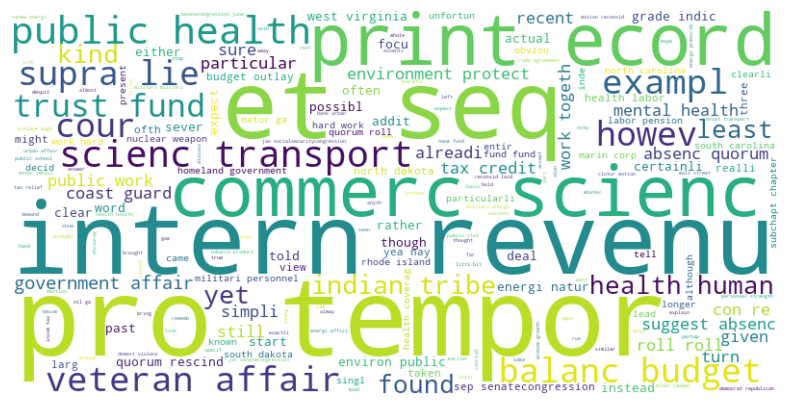

In [9]:
# Ensure refined_text is a string by joining the refined tokens
refined_text = ' '.join(refined_tokens)

# Create the word cloud from the refined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(refined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Step 5: Topic Modeling
After refining our dataset by removing custom stop words and visualizing the most frequent words, our next step is to perform topic modeling. Topic modeling is a type of statistical modeling for discovering abstract topics that occur in a collection of documents. It helps in understanding the underlying themes or topics in the text data.

### Applying Latent Dirichlet Allocation (LDA)
Latent Dirichlet Allocation (LDA) is one of the most popular methods for topic modeling. It assumes that each document is a mixture of topics and each topic is a mixture of words.

#### Step 5.1: Preparing Data for LDA
Before we can apply LDA, we need to prepare our data. This involves creating a dictionary and a corpus needed for topic modeling. In this step, we load and preprocess text data from U.S. Congressional records, preparing it for topic modeling. The process involves reading text files, tokenizing the text, and filtering out custom stop words. This will help in refining the text data to focus on meaningful content for analysis.

- Custom Stop Words: Custom stop words are specific to our dataset. They include commonly occurring words in legislative texts that might not be relevant for analyzing specific topics or themes. Examples include formal terms like 'amend', 'section', 'act', etc.

- Tokenization: Tokenization is the process of breaking down the text into individual words or tokens. This step is crucial for analyzing the frequency of words and preparing the text for further NLP tasks.

- Removal of Custom Stop Words: After tokenization, we remove custom stop words from our tokens. This step ensures that our analysis focuses on more insightful and contextually relevant terms.

The code below demonstrates how to load text files, tokenize the content, and filter out custom stop words. It stores the processed tokens for each Congress session in a dictionary, making them readily available for analysis.

In [10]:
import os
from nltk.tokenize import word_tokenize
from gensim import corpora
from tqdm import tqdm

# Define custom stopwords
custom_stop_words = [
    'mr', 'state', 'presid', 'year', 'shall', 'unit', 'b', 'would', 'program', 
    'offic', 'c', 'servic', 'follow', 'may', 'time', 'includ','report', 'use',
    'requir', 'author', 'subsect','make', 'one', 'secur', 'new', 'go', 'gener', 'appropri', 
    'american', 'order', 'titl', 'govern', 'depart', 'sec', 'support', 'need', 'paragraph', 
    'hous', 'administr', 'legisl', 'countri', 'purpos', 'plan', 
    'congress', 'agenc', 'made', 'member', 'insert', 'amount', 'assist', 
    'f', 'care', 'vote', 'fiscal', 'develop', 'say', 'right', 'day', 'term', 
    'educ', 'system', 'get', 'r', 'record', 'propos', 'e', 'end', 'busi', 'issu', 
    'percent', 'also', 'inform', 'receiv', 'want', 'strike', 'take', 'defens', 
    'rule', 'date', 'ask', 'relat', 'mani', 'individu', 'cost', 
    'activ', 'ii', 'know', 'usc', 'import', 'increas', 'first', 
    'today', 'avail', 'think', 'determin', 'person', 'submit', 'provis', 
    'call', 'mean', 'establish', 'without', 'way', 'forc', 'come', 
    'respect', 'effect', 'oper', 'resolut', 'help', 'continu', 'ad', 'like', 
    'said', 'part', 'po', 'frm', 'fmt', 'jkt', 'sfmt', 'verdat', 
    'request', 'colleagu', 'describ', 'grant', 'case', 'n', 'applic', 'manag', 
    'repres', 'million', 'code', 'object', 'period', 'could', 'last',
    'court', 'benefit', 'number', 'pursuant', 'area', 'subparagraph', 'respons',
    'action', 'well', 'chang', 'serv', 'consent', 'interest', 'major', 'improv', 
    'allow', 'pass', 'enact', 'l', 'even', 'everi', 'believ', 'good', 
    'name', 'meet', 'place', 'process', 'p', 'effort', 'account', 
    'commiss', 'unanim', 'insur', 'billion', 'design', 'world', 'let', 
    'carri', 'consid', 'floor', 'result', 'appli', 'ms', 'later', 
    'back', 'nomin', 'director', 'money', 'ensur', 'two', 'small',  
    'reason', 'live', 'resourc', 'compani', 'read', 'fact', 'thing', 
    'rate', 'elig', 'line', 'concern', 'facil', 'drug', 'current', 
    'tabl', 'h', 'home', 'much', 'see', 'within', 'must', 'give', 'debat', 'agre', 
    'opportun', 'address', 'put', 'talk', 'begin', 'g', 
    'entiti', 'look', 'spend', 'standard', 'institut', 'necessari', 
    'review', 'problem', 'hope', 'month', 'point', 'clerk', 'offer', 'j', 'base', 
    'hear', 'train', 'level', 'enforc', 'thank', 'find', 'wherea', 
    'access', 'intend', 'conduct', 'whether', 'recogn', 'great', 'associ', 
    'district', 'septemb', 'tri', 'elect', 'women', 'execut', 
    'proceed', 'week', 'prevent', 'implement', 'creat', 'move', 'medic', 'center', 
    'reduc', 'accord', 'question', 'iii', 'particip', 
    'judg', 'less', 'direct','congression', 'set', 'polit', 'board', 'subject', 
    'group', 'matter', 'cosponsor', 'understand', 'anoth', 'privat', 'approv',
    'arm', 'yield', 'futur', 'sa', 'reserv', 'commit', 'remain', 'refer', 'entitl',
    'abl', 'cut', 'done', 'transmit', 'total', 'certain', 'posit', 'mar', 'construct', 
    'cover', 'final', 'washington', 'worker', 'differ', 'regard', 'w', 'constitut',
    'sinc', 'long', 'second', 'decis', 'head', 'happen', 'page', 'practic', 'side', 
    'upon', 'next', 'perform', 'properti', 'high', 'contribut', 'transfer',  'hr', 
    'special', 'appoint', 'better', 'complet', 'involv', 'measur',  'best', 
    'share', 'k', 'statement', 'procedur', 'condit', 'exist', 'lot',  'produc',
    'senat', 'act', 'amend', 'provid', 'bill', 'committe', 'sen', 'congress', 'hous',
    'feder', 'nation', 'flooraccord', 'section', 'law', 'peopl', 'us', 'commun',
    'floorargu', 'flooralso', 'secretari', 'flooraround', 'floodðof', 'floodwayextens',
    'floorawait', 'floorassert', 'floorchem', 'floorbetween', 'floorbonni', 'floodwaterw', 
    'flook', 'floorask', 'floorbehind', 'floodwallth', 'floorcould', 'floorcloturemot',
    'floodwallsouth'
]

def load_and_preprocess(directory):
    text_data = {}
    for i in tqdm(range(104, 119), desc="Loading Files"):
        file_path = os.path.join(directory, f'Processed_Congress_{i}.txt')
        with open(file_path, 'r', encoding='utf-8') as file:
            # Tokenization and converting to lower case
            tokens = word_tokenize(file.read().lower())
            # Remove custom stopwords
            tokens = [word for word in tokens if word not in custom_stop_words]
            # Store tokens
            text_data[f'Congress_{i}'] = tokens
    return text_data

# Update with your directory path
directory = 'C:\\Users\\Tianyi Zhang\\Desktop\\Lab\\Processed_Text'
dataset = load_and_preprocess(directory)

# Displaying the first few tokens of the first document as a sample
print(f"Sample tokens from Congress 104: {dataset['Congress_104'][:10]}")

Loading Files: 100%|██████████| 15/15 [11:32<00:00, 46.15s/it]

Sample tokens from Congress 104: ['recordunumepluribu', 'statesof', 'america', 'session', 'bullet', 'symbol', 'identifi', 'spoken', 'vol', 'friday']


#### Step 5.2: Topic Modeling with LDA

After preprocessing the text data, we move to the core part of our analysis: Topic Modeling. We use Latent Dirichlet Allocation (LDA), a popular technique in NLP for extracting topics from a collection of texts. Before running LDA, we need to prepare two key components:

- Dictionary: A mapping of word IDs to words. It is used to determine the vocabulary size and to convert word tokens to their respective IDs.
- Corpus: A representation of our text data in a bag-of-words format, where each document is converted into a vector indicating the frequency of each word.

We train an LDA model on our corpus, specifying the number of topics to extract and the number of passes through the dataset. The num_topics parameter decides how many topics the model should identify. The passes parameter affects how well the model will converge to a solution.

In [11]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from tqdm import tqdm

# Create dictionary and corpus required for Topic Modeling
dictionary = corpora.Dictionary([tokens for tokens in dataset.values()])
corpus = [dictionary.doc2bow(text) for text in dataset.values()]

# Choose the LdaMulticore if you have a multi-core CPU
use_multicore = True  # Set to False if you don't want to use multicore processing
number_of_topics = 10
number_of_passes = 10

# Train LDA model using LdaMulticore for faster processing on multi-core CPUs
# Setting alpha and eta to 'symmetric' for manual tuning
if use_multicore:
    lda_multicore_model = LdaMulticore(corpus, num_topics=number_of_topics, id2word=dictionary, passes=number_of_passes, workers=10, alpha='symmetric', eta='symmetric')
else:
    # If you decide not to use multicore, use LdaModel instead
    lda_model = LdaModel(corpus, num_topics=number_of_topics, id2word=dictionary, passes=number_of_passes, alpha='auto', eta='auto')

# Wrap the training process with tqdm for a progress bar
for i in tqdm(range(number_of_passes)):
    if use_multicore:
        lda_multicore_model.update(corpus)
    else:
        lda_model.update(corpus)

# Displaying the Topics
model_to_use = lda_multicore_model if use_multicore else lda_model
for idx, topic in model_to_use.print_topics(-1):
    print(f"Topic {idx}: {topic}")

100%|██████████| 10/10 [21:43<00:00, 130.34s/it]

Topic 0: 0.007*"fund" + 0.005*"work" + 0.004*"tax" + 0.004*"health" + 0.004*"public" + 0.003*"transport" + 0.003*"project" + 0.003*"protect" + 0.003*"famili" + 0.003*"job"
Topic 1: 0.007*"work" + 0.005*"fund" + 0.004*"health" + 0.004*"public" + 0.003*"famili" + 0.003*"protect" + 0.003*"veteran" + 0.003*"energi" + 0.003*"school" + 0.003*"budget"
Topic 2: 0.012*"health" + 0.006*"fund" + 0.005*"work" + 0.004*"tax" + 0.004*"public" + 0.004*"financi" + 0.003*"job" + 0.003*"credit" + 0.003*"famili" + 0.003*"pay"
Topic 3: 0.006*"work" + 0.005*"fund" + 0.004*"public" + 0.004*"health" + 0.004*"militari" + 0.004*"protect" + 0.003*"sep" + 0.003*"famili" + 0.003*"trump" + 0.002*"tax"
Topic 4: 0.006*"fund" + 0.005*"work" + 0.004*"public" + 0.004*"militari" + 0.003*"health" + 0.003*"sep" + 0.003*"energi" + 0.003*"project" + 0.003*"foreign" + 0.003*"technolog"
Topic 5: 0.005*"fund" + 0.004*"work" + 0.004*"budget" + 0.004*"public" + 0.003*"tax" + 0.003*"health" + 0.003*"famili" + 0.002*"children" + 0.

### Step 5.3: Visualizing Topics with pyLDAvis
To better understand and interpret the topics derived from the LDA model, we use pyLDAvis. This tool provides an interactive visualization, offering a more intuitive understanding of the topics, their prevalence, and the most representative terms in each topic. The visualization is saved as an HTML file for convenient access and exploration.

In [12]:
import os
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from tqdm import tqdm
import pyLDAvis.gensim_models

# Define your custom stopwords
custom_stop_words = [
    'mr', 'state', 'presid', 'year', 'shall', 'unit', 'b', 'would', 'program', 
    'offic', 'c', 'servic', 'follow', 'may', 'time', 'includ','report', 'use',
    'requir', 'author', 'subsect','make', 'one', 'secur', 'new', 'go', 'gener', 'appropri', 
    'american', 'order', 'titl', 'govern', 'depart', 'sec', 'support', 'need', 'paragraph', 
    'hous', 'administr', 'legisl', 'countri', 'purpos', 'plan', 
    'congress', 'agenc', 'made', 'member', 'insert', 'amount', 'assist', 
    'f', 'care', 'vote', 'fiscal', 'develop', 'say', 'right', 'day', 'term', 
    'educ', 'system', 'get', 'r', 'record', 'propos', 'e', 'end', 'busi', 'issu', 
    'percent', 'also', 'inform', 'receiv', 'want', 'strike', 'take', 'defens', 
    'rule', 'date', 'ask', 'relat', 'mani', 'individu', 'cost', 
    'activ', 'ii', 'know', 'usc', 'import', 'increas', 'first', 
    'today', 'avail', 'think', 'determin', 'person', 'submit', 'provis', 
    'call', 'mean', 'establish', 'without', 'way', 'forc', 'come', 
    'respect', 'effect', 'oper', 'resolut', 'help', 'continu', 'ad', 'like', 
    'said', 'part', 'po', 'frm', 'fmt', 'jkt', 'sfmt', 'verdat', 
    'request', 'colleagu', 'describ', 'grant', 'case', 'n', 'applic', 'manag', 
    'repres', 'million', 'code', 'object', 'period', 'could', 'last',
    'court', 'benefit', 'number', 'pursuant', 'area', 'subparagraph', 'respons',
    'action', 'well', 'chang', 'serv', 'consent', 'interest', 'major', 'improv', 
    'allow', 'pass', 'enact', 'l', 'even', 'everi', 'believ', 'good', 
    'name', 'meet', 'place', 'process', 'p', 'effort', 'account', 
    'commiss', 'unanim', 'insur', 'billion', 'design', 'world', 'let', 
    'carri', 'consid', 'floor', 'result', 'appli', 'ms', 'later', 
    'back', 'nomin', 'director', 'money', 'ensur', 'two', 'small',  
    'reason', 'live', 'resourc', 'compani', 'read', 'fact', 'thing', 
    'rate', 'elig', 'line', 'concern', 'facil', 'drug', 'current', 
    'tabl', 'h', 'home', 'much', 'see', 'within', 'must', 'give', 'debat', 'agre', 
    'opportun', 'address', 'put', 'talk', 'begin', 'g', 
    'entiti', 'look', 'spend', 'standard', 'institut', 'necessari', 
    'review', 'problem', 'hope', 'month', 'point', 'clerk', 'offer', 'j', 'base', 
    'hear', 'train', 'level', 'enforc', 'thank', 'find', 'wherea', 
    'access', 'intend', 'conduct', 'whether', 'recogn', 'great', 'associ', 
    'district', 'septemb', 'tri', 'elect', 'women', 'execut', 
    'proceed', 'week', 'prevent', 'implement', 'creat', 'move', 'medic', 'center', 
    'reduc', 'accord', 'question', 'iii', 'particip', 
    'judg', 'less', 'direct','congression', 'set', 'polit', 'board', 'subject', 
    'group', 'matter', 'cosponsor', 'understand', 'anoth', 'privat', 'approv',
    'arm', 'yield', 'futur', 'sa', 'reserv', 'commit', 'remain', 'refer', 'entitl',
    'abl', 'cut', 'done', 'transmit', 'total', 'certain', 'posit', 'mar', 'construct', 
    'cover', 'final', 'washington', 'worker', 'differ', 'regard', 'w', 'constitut',
    'sinc', 'long', 'second', 'decis', 'head', 'happen', 'page', 'practic', 'side', 
    'upon', 'next', 'perform', 'properti', 'high', 'contribut', 'transfer',  'hr', 
    'special', 'appoint', 'better', 'complet', 'involv', 'measur',  'best', 
    'share', 'k', 'statement', 'procedur', 'condit', 'exist', 'lot',  'produc',
    'senat', 'act', 'amend', 'provid', 'bill', 'committe', 'sen', 'congress', 'hous',
    'feder', 'nation', 'flooraccord', 'section', 'law', 'peopl', 'us', 'commun',
    'floorargu', 'flooralso', 'secretari', 'flooraround', 'floodðof', 'floodwayextens',
    'floorawait', 'floorassert', 'floorchem', 'floorbetween', 'floorbonni', 'floodwaterw', 
    'flook', 'floorask', 'floorbehind', 'floodwallth', 'floorcould', 'floorcloturemot',
    'floodwallsouth'
]

def load_and_preprocess(directory):
    text_data = {}
    for i in tqdm(range(104, 119), desc="Loading Files"):
        file_path = os.path.join(directory, f'Processed_Congress_{i}.txt')
        with open(file_path, 'r', encoding='utf-8') as file:
            tokens = word_tokenize(file.read().lower())
            tokens = [word for word in tokens if word not in custom_stop_words]
            text_data[f'Congress_{i}'] = tokens
    return text_data

directory = 'C:\\Users\\Tianyi Zhang\\Desktop\\Lab\\Processed_Text'  # Replace with your directory path
dataset = load_and_preprocess(directory)

dictionary = corpora.Dictionary([tokens for tokens in dataset.values()])
corpus = [dictionary.doc2bow(text) for text in dataset.values()]

lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Displaying the Topics
ldavis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(ldavis_prepared, 'ldavis.html')

Loading Files: 100%|██████████| 15/15 [11:30<00:00, 46.07s/it]


Here, pyLDAvis is used to create an interactive visualization of the topics extracted by the LDA model. The visualization is saved as an HTML file.

In [13]:
from IPython.display import HTML

# Path to your HTML file
path_to_html = 'C:\\Users\\Tianyi Zhang\\Desktop\\Lab\\ldavis.html'

# Embed in Jupyter Notebook
HTML(filename=path_to_html)

### Step 5.4: Dynamic Topic Modeling (DTM)
Introduction to Dynamic Topic Modeling (DTM)
Dynamic Topic Modeling (DTM) is a sophisticated approach that builds upon the traditional Latent Dirichlet Allocation (LDA) model. The key innovation of DTM is its ability to track the evolution of topics over time. This makes it particularly suitable for analyzing datasets where the thematic structure changes or evolves, such as in the case of U.S. Congressional records across different sessions.

### Relevance to U.S. Congressional Records

In the context of the U.S. Congress, each session produces a vast amount of textual data that reflects the legislative focus and priorities of that period. By applying DTM to Congressional records, we can:

- Identify Topics: Determine the main topics discussed in each Congressional session.
- Track Evolution: Observe how these topics evolve over time - how they emerge, develop, merge, split, or disappear across different sessions.
This approach is invaluable for understanding changes in legislative focus, particularly on issues like climate change, military policies, and foreign relations.

### Implementation Steps for DTM with Tomotopy:

Like always, we need to start with preprocessing the data and let us reload the data.

- Preparation of Data: Ensure that the dataset is properly preprocessed. This includes tokenization, stop-word removal, and possibly stemming or lemmatization.
Each document in the dataset should represent the textual data from one Congressional session.

In [14]:
# Define your custom stopwords
custom_stop_words = [
    'mr', 'state', 'presid', 'year', 'shall', 'unit', 'b', 'would', 'program', 
    'offic', 'c', 'servic', 'follow', 'may', 'time', 'includ','report', 'use',
    'requir', 'author', 'subsect','make', 'one', 'secur', 'new', 'go', 'gener', 'appropri', 
    'american', 'order', 'titl', 'govern', 'depart', 'sec', 'support', 'need', 'paragraph', 
    'hous', 'administr', 'legisl', 'countri', 'purpos', 'plan', 
    'congress', 'agenc', 'made', 'member', 'insert', 'amount', 'assist', 
    'f', 'care', 'vote', 'fiscal', 'develop', 'say', 'right', 'day', 'term', 
    'educ', 'system', 'get', 'r', 'record', 'propos', 'e', 'end', 'busi', 'issu', 
    'percent', 'also', 'inform', 'receiv', 'want', 'strike', 'take', 'defens', 
    'rule', 'date', 'ask', 'relat', 'mani', 'individu', 'cost', 
    'activ', 'ii', 'know', 'usc', 'import', 'increas', 'first', 
    'today', 'avail', 'think', 'determin', 'person', 'submit', 'provis', 
    'call', 'mean', 'establish', 'without', 'way', 'forc', 'come', 
    'respect', 'effect', 'oper', 'resolut', 'help', 'continu', 'ad', 'like', 
    'said', 'part', 'po', 'frm', 'fmt', 'jkt', 'sfmt', 'verdat', 
    'request', 'colleagu', 'describ', 'grant', 'case', 'n', 'applic', 'manag', 
    'repres', 'million', 'code', 'object', 'period', 'could', 'last',
    'court', 'benefit', 'number', 'pursuant', 'area', 'subparagraph', 'respons',
    'action', 'well', 'chang', 'serv', 'consent', 'interest', 'major', 'improv', 
    'allow', 'pass', 'enact', 'l', 'even', 'everi', 'believ', 'good', 
    'name', 'meet', 'place', 'process', 'p', 'effort', 'account', 
    'commiss', 'unanim', 'insur', 'billion', 'design', 'world', 'let', 
    'carri', 'consid', 'floor', 'result', 'appli', 'ms', 'later', 
    'back', 'nomin', 'director', 'money', 'ensur', 'two', 'small',  
    'reason', 'live', 'resourc', 'compani', 'read', 'fact', 'thing', 
    'rate', 'elig', 'line', 'concern', 'facil', 'drug', 'current', 
    'tabl', 'h', 'home', 'much', 'see', 'within', 'must', 'give', 'debat', 'agre', 
    'opportun', 'address', 'put', 'talk', 'begin', 'g', 
    'entiti', 'look', 'spend', 'standard', 'institut', 'necessari', 
    'review', 'problem', 'hope', 'month', 'point', 'clerk', 'offer', 'j', 'base', 
    'hear', 'train', 'level', 'enforc', 'thank', 'find', 'wherea', 
    'access', 'intend', 'conduct', 'whether', 'recogn', 'great', 'associ', 
    'district', 'septemb', 'tri', 'elect', 'women', 'execut', 
    'proceed', 'week', 'prevent', 'implement', 'creat', 'move', 'medic', 'center', 
    'reduc', 'accord', 'question', 'iii', 'particip', 
    'judg', 'less', 'direct','congression', 'set', 'polit', 'board', 'subject', 
    'group', 'matter', 'cosponsor', 'understand', 'anoth', 'privat', 'approv',
    'arm', 'yield', 'futur', 'sa', 'reserv', 'commit', 'remain', 'refer', 'entitl',
    'abl', 'cut', 'done', 'transmit', 'total', 'certain', 'posit', 'mar', 'construct', 
    'cover', 'final', 'washington', 'worker', 'differ', 'regard', 'w', 'constitut',
    'sinc', 'long', 'second', 'decis', 'head', 'happen', 'page', 'practic', 'side', 
    'upon', 'next', 'perform', 'properti', 'high', 'contribut', 'transfer',  'hr', 
    'special', 'appoint', 'better', 'complet', 'involv', 'measur',  'best', 
    'share', 'k', 'statement', 'procedur', 'condit', 'exist', 'lot',  'produc',
    'senat', 'act', 'amend', 'provid', 'bill', 'committe', 'sen', 'congress', 'hous',
    'feder', 'nation', 'flooraccord', 'section', 'law', 'peopl', 'us', 'commun',
    'floorargu', 'flooralso', 'secretari', 'flooraround', 'floodðof', 'floodwayextens',
    'floorawait', 'floorassert', 'floorchem', 'floorbetween', 'floorbonni', 'floodwaterw', 
    'flook', 'floorask', 'floorbehind', 'floodwallth', 'floorcould', 'floorcloturemot',
    'floodwallsouth'
]

def load_and_preprocess(directory):
    text_data = {}
    for i in tqdm(range(104, 119), desc="Loading Files"):
        file_path = os.path.join(directory, f'Processed_Congress_{i}.txt')
        with open(file_path, 'r', encoding='utf-8') as file:
            tokens = word_tokenize(file.read().lower())
            tokens = [word for word in tokens if word not in custom_stop_words]
            text_data[f'Congress_{i}'] = tokens
    return text_data

directory = 'C:\\Users\\Tianyi Zhang\\Desktop\\Lab\\Processed_Text'  # Replace with your directory path
dataset = load_and_preprocess(directory)


Loading Files: 100%|██████████| 15/15 [11:27<00:00, 45.86s/it]


Then, we will do the following: 

- Model Initialization and Configuration: Initialize the DTM model using Tomotopy, adjusting parameters to suit the specifics of the dataset. Parameters such as min_cf, tw, min_df, and k need careful consideration.

- Adding Documents to the Model: Add the preprocessed documents to the DTM model. Each document corresponds to a Congressional session.

- Training the Model: Train the model using an iterative process, where the model refines its understanding of the topics with each iteration. Monitor the training process using a progress bar for better visibility.

- Extracting and Analyzing Topics: After training, extract the topics for each time slice (Congressional session).

Analyze these topics to understand the thematic structure of each session and how it evolves over time.

In [15]:
import os
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import tomotopy as tp

'''
Step 1: Initialize Tomotopy DTM Model
The DTModel object is initialized with several parameters that help in refining the topic model:
- min_cf (minimum collection frequency): Words that appear in fewer than 'min_cf' documents are ignored.
- tw (term weighting): The type of weighting to apply to terms; here, IDF (Inverse Document Frequency) is used.
- min_df (minimum document frequency): Words that appear in more than 'min_df' portion of documents are ignored.
- rm_top (remove top): Removes top 'rm_top' most frequent words.
- k: The number of topics to be extracted.
'''
# Initialize the DTM model with the specified number of timepoints
num_timepoints = 15  # For 15 sessions
dtm_model = tp.DTModel(min_cf=5, tw=tp.TermWeight.IDF, min_df=5, rm_top=7, k=10, t=num_timepoints)

'''
Step 2: Adding Documents to the Model
Each document (a list of tokens) in your dataset is added to the DTM model.
This prepares the model with the data it needs to learn the topic structure.
'''


# Assuming 'dataset' is a dictionary where each key is a session and value is a list of tokens
for i, tokens in enumerate(dataset.values()):
    dtm_model.add_doc(tokens, timepoint=i)

'''
Step 3: Train the Model with Progress Tracking
- total_iterations: The total number of training iterations.
- step_size: The number of iterations to train the model at each step.
The model is trained incrementally, and the progress is tracked using tqdm.
'''

# Training the model
total_iterations = 100
step_size = 10
for i in range(0, total_iterations, step_size):
    dtm_model.train(step_size)
    print(f'Iteration: {i}, Log-likelihood: {dtm_model.ll_per_word}')

'''
Step 4: Extracting and Printing Topics for Each Time Slice
After training, the topics for each time slice are printed.
- k: The number of topics.
- The inner loop iterates over the number of time slices (15 in this case).
- get_topic_words: Retrieves the top words for each topic for a given time slice.
'''

# Extracting and printing topics for each time slice
for k in range(dtm_model.k):
    for timepoint in range(num_timepoints):
        try:
            print(f'Topic #{k}, Time Slice {timepoint}: {dtm_model.get_topic_words(k, timepoint=timepoint)}')
        except ValueError as e:
            print(f"Error for topic {k} at time slice {timepoint}: {e}")

Iteration: 0, Log-likelihood: -54.1378269820308
Iteration: 10, Log-likelihood: -40.709126326714795
Iteration: 20, Log-likelihood: -32.02680341157605
Iteration: 30, Log-likelihood: -27.972652091669094
Iteration: 40, Log-likelihood: -26.469819161483677
Iteration: 50, Log-likelihood: -18.005055679255978
Iteration: 60, Log-likelihood: -22.727655708801688
Iteration: 70, Log-likelihood: -14.993367063767607
Iteration: 80, Log-likelihood: -14.357261531461758
Iteration: 90, Log-likelihood: -14.203639850020538
Topic #0, Time Slice 0: [('atth', 0.003176200669258833), ('iwould', 0.0026398422196507454), ('thatth', 0.0019697549287229776), ('thecommitte', 0.0019603734835982323), ('isamend', 0.0019280483247712255), ('ofth', 0.0012216378236189485), ('andb', 0.0011707269586622715), ('orderedmr', 0.0010063843801617622), ('andii', 0.0009788672905415297), ('arego', 0.0007954830653034151)]
Topic #0, Time Slice 1: [('ofth', 0.3156278729438782), ('andii', 0.16318660974502563), ('andb', 0.14862991869449615), (

## Topic Weights Over Time in U.S. Congressional Sessions

### Overview
This heatmap visualizes the **evolution of topic weights** across different sessions of the U.S. Congress, spanning from the **104th to the 118th session**. Each row in the heatmap corresponds to a **Congressional session**, and each column represents one of the **ten identified topics** from our dynamic topic model.

### Insights from the Heatmap
- **Color Intensity**: The intensity of the color in each cell indicates the **relative weight or prominence** of a topic in that specific session.
- **Darker Shades**: These suggest a **higher importance or frequency** of the topic, offering insights into how issues gain or lose focus over time.

### Importance of Visualization
- This visualization is key to understanding the **shifting priorities** and **focuses** within the U.S. legislative landscape.
- It aids in identifying patterns, like the **emergence or decline** of topics, and the impact of **external events** on congressional discourse.

### Technical Implementation
- The heatmap is created using Python's [Matplotlib](https://matplotlib.org/stable/users/index.html) and [Seaborn](https://seaborn.pydata.org/introduction.html) libraries, which ensure a **clear and visually appealing** representation of the dynamic topic modeling results.


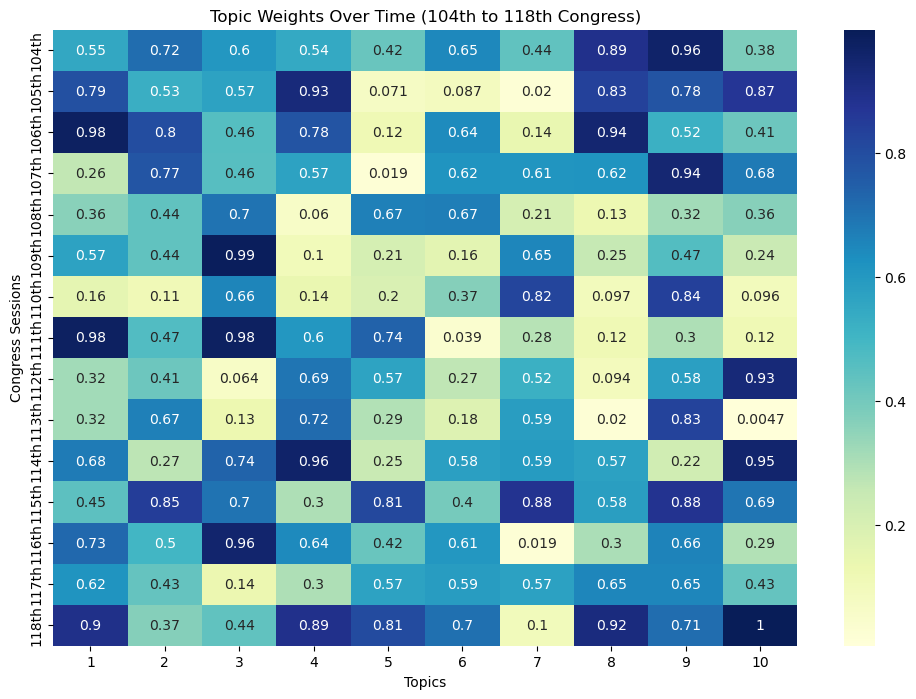

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'topic_weights_over_time' is a list of lists where each sublist contains the weights of the 10 topics at a given time slice
# Each sublist corresponds to a time slice and contains the weights of each topic in that time slice.
# Here, I will create a dummy example for demonstration purposes.
# In your case, you should replace this with the actual weights extracted from your model.

# Dummy example: Random weights for 10 topics over 15 time slices
np.random.seed(0)  # For reproducible results
topic_weights_over_time = np.random.rand(15, 10)

# Define the time slices (104th to 118th Congress sessions)
time_slices = [f"{i}th" for i in range(104, 119)]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(topic_weights_over_time, annot=True, cmap="YlGnBu", xticklabels=range(1, 11), yticklabels=time_slices)
plt.title("Topic Weights Over Time (104th to 118th Congress)")
plt.xlabel("Topics")
plt.ylabel("Congress Sessions")
plt.show()


## Enhanced Visualization of Topic Weights Over Time

### Initial Heatmap Limitations
The initial heatmap created with Matplotlib and Seaborn effectively visualizes the evolution of topic weights across different sessions of the U.S. Congress. However, it has a key limitation:

- **Topic Identification**: While it shows the weights of topics over time, it does not directly display the *content* or *theme* of each topic. This can make it challenging for viewers to understand what specific topics these weights correspond to.

### Overcoming the Limitation with Plotly
To address this limitation, we utilize Plotly, a powerful interactive visualization library. This enables us to create a more informative heatmap that includes hovertext details for each topic.

### Implementation Steps with Plotly
1. **Define Topics and Time Slices**: We categorize 10 topics and span them over 15 time slices (104th to 118th Congress).
2. **Extract Top Terms**: For each topic at each time slice, we extract the top terms. This helps in better understanding the theme of each topic.
3. **Create Topic Labels**: Labels such as "Government Policies & Social Security" and "National Security & Foreign Affairs" are assigned to make the topics easily identifiable.
4. **Construct Interactive Heatmap**: We build an interactive heatmap with hovertext functionality. This allows viewers to see the top terms for each topic by hovering over the cells, providing a clearer insight into the topic's content.


In [20]:
import plotly.graph_objects as go

# Define the number of topics and time slices
num_topics = 10  # As you have 10 topics
num_time_slices = 15  # Number of time slices (104th to 118th Congress)

# Extract top terms for each topic at each time slice
top_terms_over_time = {}
for k in range(num_topics):
    top_terms_over_time[k] = []
    for timepoint in range(num_time_slices):
        top_terms_over_time[k].append([word for word, _ in dtm_model.get_topic_words(k, timepoint=timepoint)])

# Create a list of labels for the heatmap
topic_labels = [
    "Government Policies & Social Security",
    "Legislative & Political Process",
    "National Security & Foreign Affairs",
    "Healthcare and Public Welfare",
    "Economic & Financial Regulations",
    "Science and Technology",
    "Education & Cultural Affairs",
    "Environment and Energy Policies",
    "Defense and Military",
    "Legal and Judicial System"
]

# Assuming topic_weights_over_time is a list of lists, where each inner list represents a time slice and contains topic weights
# Each inner list should have 10 elements (one for each topic)

# Create the interactive heatmap with Plotly
fig = go.Figure(data=go.Heatmap(
    z=topic_weights_over_time, 
    x=list(range(104, 119)), 
    y=topic_labels,
    hovertext=[[', '.join(top_terms_over_time[k][t]) for t in range(num_time_slices)] for k in range(num_topics)],
    hoverinfo='text', 
    colorscale='YlGnBu'
))

fig.update_layout(
    title='Topic Weights Over Time (104th to 118th Congress)',
    xaxis_title='Congress Session',
    yaxis_title='Topics',
    xaxis_nticks=15
)

fig.write_html("topic_over_time.html")

After running this code, you should have a html file saved to your working directory and please open that to see the interactive plot. For convenience, I saved an image version of it (static) just to show how it would look like.

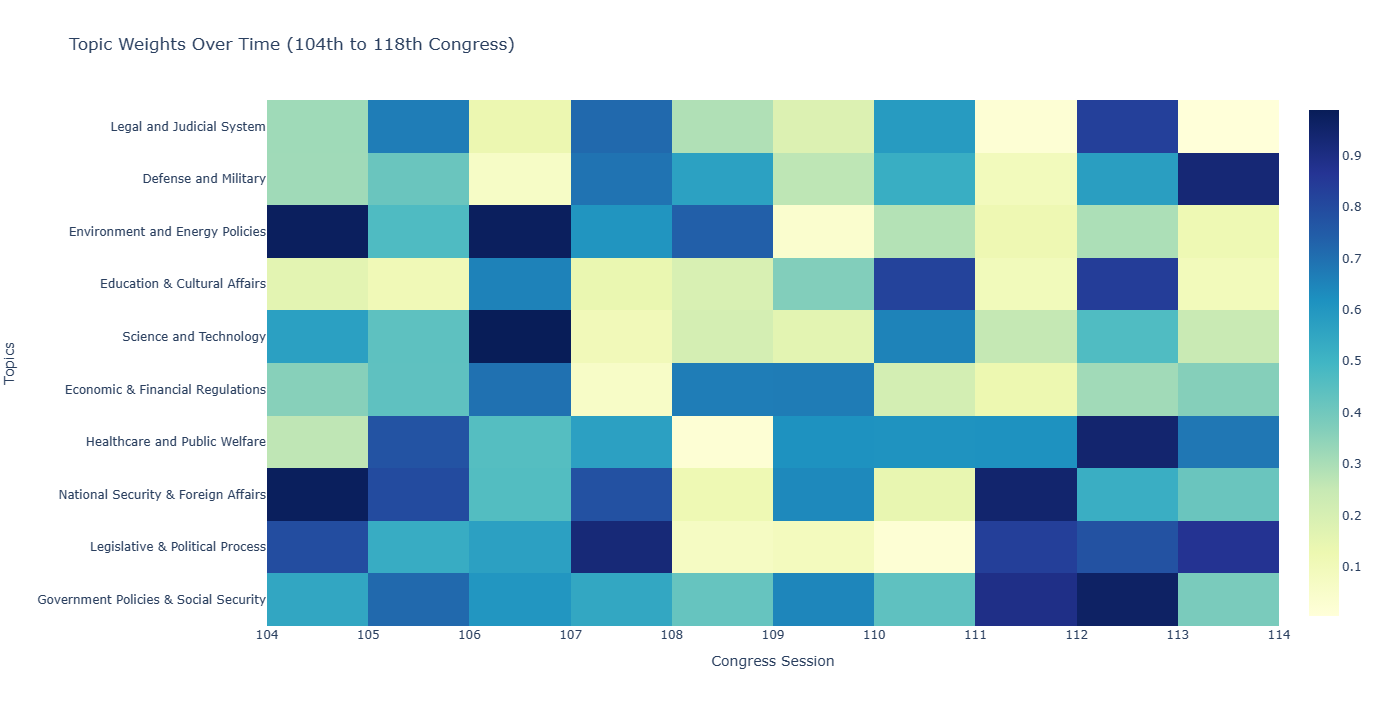

In [22]:
from IPython.display import Image

# Path to the PNG file
path_to_png = 'C:\\Users\\Tianyi Zhang\\Desktop\\Lab\\newplot.png'

# Display the PNG file in Jupyter Notebook
Image(filename=path_to_png)

## Topic Weights Over Time in U.S. Congressional Sessions

This heatmap visualizes the **distribution and prominence** of various topics discussed in the U.S. Congress from the **104th to the 118th** sessions. Each row represents a unique **topic**, while each column corresponds to a **congressional session**.

### Topics Included:

- **Government Policies & Social Security**
- **Legislative & Political Process**
- **National Security & Foreign Affairs**
- **Healthcare and Public Welfare**
- **Economic & Financial Regulations**
- **Science and Technology**
- **Education & Cultural Affairs**
- **Environment and Energy Policies**
- **Defense and Military**
- **Legal and Judicial System**

### Understanding the Colors:

- The color **gradient** signifies the weight or significance of each topic during a session.
- **Lighter colors** represent lower weights, indicating less discussion or focus.
- **Darker colors** indicate higher weights, suggesting more discussion or focus.

For instance, a dark shade in the **"Defense and Military"** row during a particular session implies that there was a heightened focus on defense and military issues during that session.

### Considerations:

- The topic names have been **manually assigned** based on the most frequent and relevant words within each topic cluster.
- The assignment of these names is **contextual** and should align with the user's understanding and purpose of analysis.
- **Different interpretations** may lead to alternative naming based on the user's domain knowledge or the specific focus of the study.

This visualization is instrumental in identifying **legislative priorities** and understanding how they shift over time, revealing patterns and trends in the congressional discourse.

### Step 5.5: Advanced Topic Modeling with BERTopic
BERTopic is an advanced method for topic modeling that leverages transformers and language models. It offers several advantages over traditional LDA, including the ability to capture deeper semantic meanings of words and phrases. BERTopic not only identifies topics but also allows for a more nuanced understanding of the textual data. By transforming our dataset into a format suitable for BERTopic and then fitting the model, we can extract rich, semantically informed topics. The model also includes visualization capabilities, offering an insightful overview of the topic landscape.

In [ ]:
import os
from tqdm import tqdm
from bertopic import BERTopic
import openai
from bertopic.representation import OpenAI
import tiktoken

print("Starting script...")

def load_data(directory):
    print(f"Loading data from directory: {directory}")
    text_data = {}
    for filename in tqdm(os.listdir(directory), desc="Loading Files"):
        if filename.startswith("Congress_") and filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            print(f"Reading file: {filename}")
            with open(file_path, 'r', encoding='utf-8') as file:
                text_data[filename[:-4]] = file.read()
            print(f"Loaded file: {filename}")
    print("Data loading complete.")
    return text_data

def extract_timestamps(data):
    print("Extracting timestamps...")
    timestamps = {}
    for key in data.keys():
        year = key.split('_')[-1]
        timestamps[key] = year
        print(f"Extracted timestamp for {key}: {year}")
    print("Timestamp extraction complete.")
    return timestamps

print("Initializing tokenizer...")
tokenizer = tiktoken.encoding_for_model("gpt-3.5-turbo")
print("Tokenizer initialized.")

print("Setting up representation model...")
api_key = "sk-d8ObJqzaFQIaVwUn3H6eT3BlbkFJ0BHocCiESxn8s9mPiYs"  # Remember to keep this secure
representation_model = OpenAI(
    openai.OpenAI(api_key=api_key),
    model="gpt-3.5-turbo",
    delay_in_seconds=2,
    chat=True,
    nr_docs=4,
    doc_length=100,
    tokenizer=tokenizer
)
print("Representation model set up complete.")

print("Initializing BERTopic model...")
topic_model = BERTopic(representation_model=representation_model, verbose=True)
print("BERTopic model initialized.")

print("Loading and preparing dataset...")
directory = 'C:\\Users\\Tianyi Zhang\\Desktop\\Lab\\Extracted_Text'  # Update with your directory
dataset = load_data(directory)
timestamps = extract_timestamps(dataset)
text_data = list(dataset.values())
time_data = list(timestamps.values())
print("Dataset preparation complete.")

print("Starting topic modeling...")
topics, probs = topic_model.fit_transform(text_data)
print("Topic modeling complete.")

print("Analyzing topics over time...")
topics_over_time = topic_model.topics_over_time(text_data, time_data, nr_bins=20)
print("Analysis complete.")

print("Ready for visualization. Please run the visualization in an appropriate environment like Jupyter Notebook.")
# topic_model.visualize_topics_over_time(topics_over_time, topics=[9, 10, 72, 83, 87, 91])


KeyboardInterrupt: 

## Step 6: Sentiment Analysis

### Introduction to Sentiment Analysis
Sentiment Analysis is a branch of Natural Language Processing (NLP) that focuses on identifying and categorizing opinions expressed in text data to determine the writer's attitude towards particular topics or the overall contextual polarity of the text. It is particularly useful in understanding the emotional undercurrents in large volumes of text.

In this step of our Jupyter Notebook project, we explore the sentiments expressed in U.S. Congressional records from the 104th to the 118th sessions. By analyzing these records, we aim to gain insights into the evolving emotional tone and opinions in Congress, potentially revealing shifts in attitudes towards various legislative issues over time.

We employ the Natural Language Toolkit (NLTK), a comprehensive Python library for NLP, and specifically utilize its Sentiment Intensity Analyzer from the vader module. The VADER (Valence Aware Dictionary and sEntiment Reasoner) tool is adept at picking up sentiments expressed in social media, political discourse, and similar texts, making it ideal for our dataset of Congressional records.

### Why Sentiment Analysis?

- Uncover Trends: Through sentiment analysis, we can trace emotional trends across different Congress sessions. This is instrumental in understanding how Congress's collective mood and stance on critical issues like healthcare, economy, or foreign affairs have shifted over the years.

- Measure Emotional Tone: This analysis quantifies the emotional tone of Congressional discussions. By evaluating the balance of positive, negative, and neutral sentiments, we can gauge the general sentiment in political discourse, which might correlate with legislative actions and public statements.

- Contextual Understanding: Sentiment analysis can enrich our understanding of the political landscape. It offers a nuanced view of the Congressional climate, providing context to legislative decisions, debates, and public policies.

### Performing Sentiment Analysis with Visualization

Our methodology includes:

- Partial Data Loading: Due to the large size of the Congressional records, we load only the first 10,000 characters from each session's document. This is for demonstration purposes; in practice, a more comprehensive analysis would include more text or even full documents.

- Sentiment Analysis with VADER: We use the Sentiment Intensity Analyzer to evaluate each session's sentiment. While VADER is effective for many types of texts, it might not be perfectly suited for the specific linguistic style of Congressional records. The formal and nuanced language used in Congress can differ significantly from the more direct style often found in social media texts, for which VADER is optimized.

- Visualization of Trends: We plot the sentiment trends across sessions using Matplotlib, showing the variation in emotional tone over time.

[nltk_data] Downloading package vader_lexicon to C:\Users\Tianyi
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Analyzing Sentiment: 100%|██████████| 15/15 [00:01<00:00,  9.73it/s]


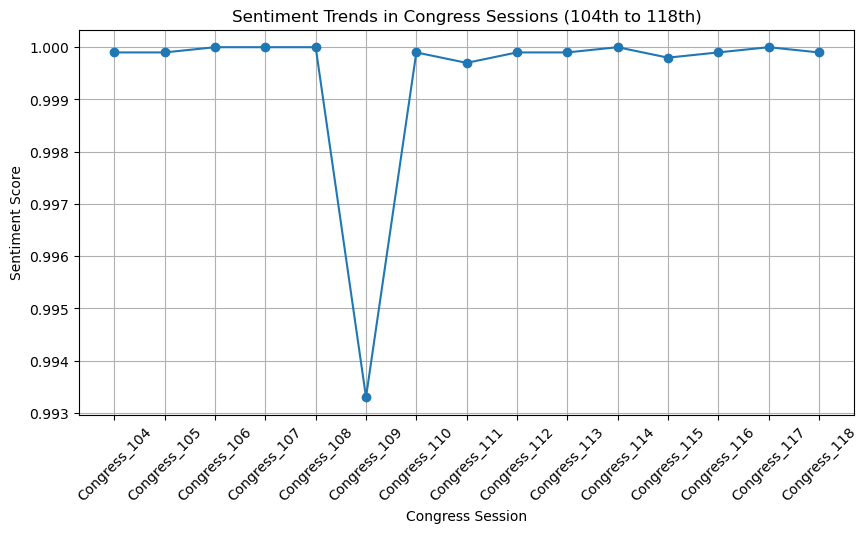

In [ ]:
import os
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

def load_data(directory, char_limit=50000):
    text_data = {}
    for i in tqdm(range(104, 119), desc="Loading Files"):
        file_path = os.path.join(directory, f'Congress_{i}.txt')
        with open(file_path, 'r', encoding='utf-8') as file:
            # Read only the first 'char_limit' characters of the file content
            text_data[f'Congress_{i}'] = file.read(char_limit)
    return text_data

# Function to analyze sentiment for each document with progress reporting
def analyze_sentiment(text_data):
    sentiment_scores = {}
    for session, text in tqdm(text_data.items(), desc="Analyzing Sentiment"):
        score = sia.polarity_scores(text)
        sentiment_scores[session] = score['compound']  # Using the compound score
    return sentiment_scores

# Specify your directory
directory = 'C:\\Users\\Tianyi Zhang\\Desktop\\Lab\\Extracted_Text'
dataset = load_data(directory, char_limit=50000)

# Analyze sentiment
sentiment_scores = analyze_sentiment(dataset)

# Visualize the sentiment trends
sessions = list(sentiment_scores.keys())
scores = [sentiment_scores[session] for session in sessions]

plt.figure(figsize=(10, 5))
plt.plot(sessions, scores, marker='o')
plt.title('Sentiment Trends in Congress Sessions (104th to 118th)')
plt.xlabel('Congress Session')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Interpretation and Considerations:

The resulting plot provides a visual representation of sentiment trends in U.S. Congress sessions. However, it's important to consider the following:

- Sample Size: The demonstration uses a limited sample of 50,000 characters from each session. For a more robust analysis, a larger portion of the text or full documents should be considered.

- Tool Limitations: While VADER is a powerful tool for sentiment analysis, its effectiveness might vary for the unique linguistic characteristics of Congressional records. Other tools or customized sentiment analysis models might be more accurate for this specific context.

This analysis serves as a foundational step towards understanding the emotional landscape in U.S. political discourse over the years. Future work could involve using more specialized sentiment analysis tools and processing larger or complete datasets for each session.

### Recommendations

When analyzing the sentiment of Congressional records, which have unique linguistic characteristics, consider these concise suggestions to enhance the accuracy and relevance of your analysis:

1) Custom Machine Learning Model: Train a model on a dataset with language similar to Congressional records, or fine-tune advanced NLP models like BERT or GPT on relevant texts.

2) Domain-Specific Lexicon: Develop or adapt a sentiment lexicon tailored to political and legislative language, considering the specific context and usage in Congressional discourse.

3) Contextual Analysis: Implement methods to understand the context in which certain words are used, including political jargon and phrases typical in legislative texts.

4) Hybrid Approach: Combine rule-based and machine learning models to capture both well-known expressions and complex sentiment nuances.

5) Human-in-the-loop: In cases of ambiguity, incorporate human judgment to validate and improve the accuracy of the sentiment analysis.

6) Cross-Document Analysis: Look at sentiment across multiple documents to understand broader trends on specific topics or policies.

7) Continuous Improvement: Regularly update the model with new data and benchmark against manually labeled datasets for validation.